In [ ]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Flatten
#from keras.layers import SimpleRNN,LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [ ]:
np.sin(x)

In [ ]:
#X = [[[(i*j +j)/500] for i in range(5)] for j in range(100)]
#Y = [(i*6)/500 for i in range(100)]

In [ ]:
#X = [[[(i*j +j)] for i in range(5)] for j in range(100)]
#Y = [(i*6) for i in range(100)]
X_data = [np.sin(i) for i in range(100)]
X = [[[np.sin(i+j)] for j in range(5)] for i in range(94)]
Y = [np.sin(i+6) for i in range(94)]

In [ ]:
X=[]
Y=[]
for i in range(94):
  Z=X_data[i:i+5]
  M=[]
  for j in range(5):
    W=[]
    W.append(Z[j])
    M.append(W)
  X.append(M)
  Y.append(X_data[i+6])

In [ ]:
  for i in range(100):
    print(X[i],Y[i])

[[0.0], [0.8414709848078965], [0.9092974268256817], [0.1411200080598672], [-0.7568024953079282]] -0.27941549819892586
[[0.8414709848078965], [0.9092974268256817], [0.1411200080598672], [-0.7568024953079282], [-0.9589242746631385]] 0.6569865987187891
[[0.9092974268256817], [0.1411200080598672], [-0.7568024953079282], [-0.9589242746631385], [-0.27941549819892586]] 0.9893582466233818
[[0.1411200080598672], [-0.7568024953079282], [-0.9589242746631385], [-0.27941549819892586], [0.6569865987187891]] 0.4121184852417566
[[-0.7568024953079282], [-0.9589242746631385], [-0.27941549819892586], [0.6569865987187891], [0.9893582466233818]] -0.5440211108893698
[[-0.9589242746631385], [-0.27941549819892586], [0.6569865987187891], [0.9893582466233818], [0.4121184852417566]] -0.9999902065507035
[[-0.27941549819892586], [0.6569865987187891], [0.9893582466233818], [0.4121184852417566], [-0.5440211108893698]] -0.5365729180004349
[[0.6569865987187891], [0.9893582466233818], [0.4121184852417566], [-0.54402111

IndexError: ignored

In [ ]:
#X[0]
Y[0]

-0.27941549819892586

In [ ]:
X = np.array(X, dtype="float32")
Y = np.array(Y, dtype="float32")

In [ ]:
X /= 500
Y/= 500

In [ ]:
X.shape

(94, 5, 1)

In [ ]:
Y.shape

(94,)

In [ ]:
Y

array([], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
                                                    #random_state=5)

In [ ]:
X_train

In [ ]:
from keras.layers import SimpleRNN
#from keras.layers import LSTM
model = Sequential()
model.add(SimpleRNN(2,input_shape=(5,1), return_sequences=True))
#model.add(SimpleRNN(2,input_shape=(5,1), return_sequences=True))
#model.add(SimpleRNN(1))
#model.add(SimpleRNN(1,input_shape=(5,1), return_state=True))
#model.add(LSTM((40),input_shape=(5,1), return_sequences=True))
#model.add(LSTM((3),input_shape=(5,1), return_state=True))
#model.add(SimpleRNN(50, return_sequences=True))
#model.add(SimpleRNN(50, return_sequences=True))
model.add(Flatten())
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam',loss='mae', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 5, 2)              8         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test))




Train on 75 samples, validate on 19 samples
Epoch 1/1000





75/75 [==============================] - 1s 13ms/step - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 2/1000
75/75 [==============================] - 0s 163us/step - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 3/1000
75/75 [==============================] - 0s 158us/step - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 4/1000
75/75 [==============================] - 0s 159us/step - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 5/1000
75/75 [==============================] - 0s 249us/step - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0035 - val_acc: 0.0000e+00
Epoch 6/1000
75/75 [==============================] - 0s 196us/step - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 7/1000
75/75 [==============================] - 0s 160us/step - loss: 0.0029 - acc: 0.0000e

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
y_predict

array([[-1.8822883e-03],
       [ 7.4204878e-04],
       [-6.1771291e-04],
       [-1.8671013e-03],
       [ 1.9012867e-03],
       [-1.9640562e-03],
       [-9.6877986e-05],
       [-2.0335875e-03],
       [ 1.9188443e-03],
       [-6.5147178e-04],
       [ 2.0148243e-04],
       [ 7.0891291e-04],
       [-1.5805956e-03],
       [ 1.2436260e-03],
       [ 1.6085485e-03],
       [-1.1293236e-03],
       [-1.7385273e-03],
       [ 7.4118463e-04],
       [ 7.7405956e-04]], dtype=float32)

In [ ]:
y_test

array([-1.8330431e-03,  8.4033405e-04, -5.7580660e-04, -1.7958554e-03,
        1.9787166e-03, -1.8965643e-03, -5.3102307e-05, -1.9702925e-03,
        1.9998236e-03, -6.0962123e-04,  2.4714624e-04,  7.5921550e-04,
       -1.5019744e-03,  1.3404584e-03,  1.7018070e-03, -1.0431020e-03,
       -1.6635496e-03,  7.9185033e-04,  8.7232952e-04], dtype=float32)

In [ ]:
#y_train

In [ ]:
#y_predict = model.predict(X_test)

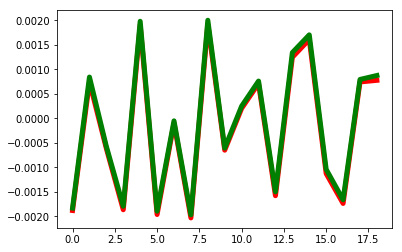

In [ ]:
plt.plot(range(19),  y_predict, lw=5,c='r')
plt.plot(range(19),  y_test, lw=5, c='g')
plt.show()

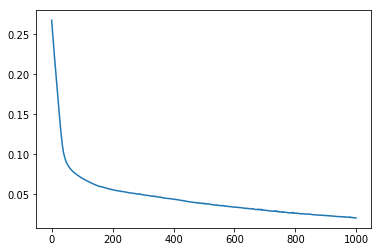

In [ ]:
plt.plot(hist.history['loss'])
plt.show()

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, SimpleRNN, Dense

# Provided data
X_data = [np.sin(i) for i in range(100)]
X = np.array([[[np.sin(i+j)] for j in range(5)] for i in range(94)])
Y = np.array([np.sin(i+6) for i in range(94)])


In [2]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(50, return_sequences=True), input_shape=(5, 1)))
model.add(Bidirectional(SimpleRNN(50)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 5, 100)            5200      
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 100)               15100     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 20401 (79.69 KB)
Trainable params: 20401 (79.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
